In [6]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


**Importing Libraries**

In [0]:
%tensorflow_version 2.x

In [17]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras import optimizers
from sklearn.metrics import classification_report, confusion_matrix

Using TensorFlow backend.


**Fetching Dataset**

In [0]:
h5f = h5py.File('/content/drive/My Drive/Project_NN/SVHN_single_grey1.h5', 'r')

In [0]:
# Load the training, test & validation set
X_train = h5f['X_train'][:]
X_test = h5f['X_test'][:]
y_train = h5f['y_train'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]
h5f.close()

In [20]:
print(y_train.view())
print(y_test.view())
print(y_val.view())

[2 6 7 ... 7 0 4]
[1 7 2 ... 7 9 2]
[0 0 0 ... 9 9 9]


In [21]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(42000, 32, 32)
(60000, 32, 32)
(18000, 32, 32)
(42000,)
(60000,)
(18000,)


In [0]:
y_train = tf.keras.utils.to_categorical(y_train,num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val,num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test,num_classes=10)

In [23]:
print(y_train.shape)
print('First 5 examples now are: ', y_train[0:5])

(42000, 10)
('First 5 examples now are: ', array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32))


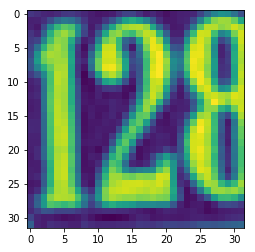

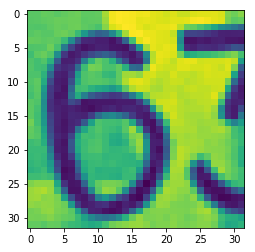

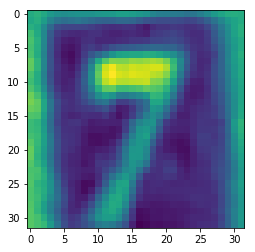

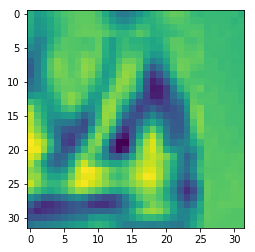

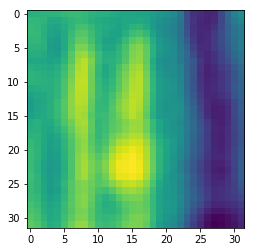

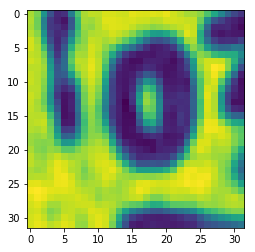

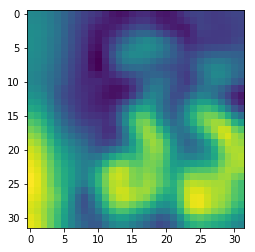

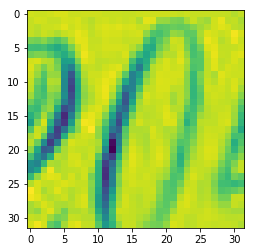

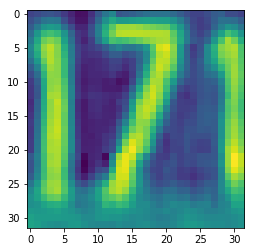

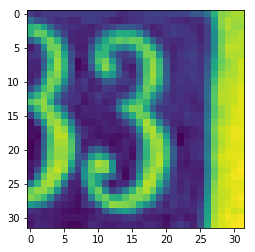

In [24]:
for i in range(10):
    image = X_train[i]
    plt.figure(i)
    plt.imshow(image)

**Neural Network (Forward prop & Back propogation)**

In [0]:
#Initialize sequenial model
model = Sequential()

In [0]:
#Reshape data from 2D to 1D ->32*32 to 1024
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

In [0]:
#Add 1st Dense layer with 100 neurons in the hidden layer & RELU as activation function
model.add(Dense(100,activation = 'relu'))

In [0]:
#Add Dense Layer which provides 10 outputs after applying softmax
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [0]:
#Compile the model with stochastic gradient descent & cross entropy loss
model.compile(optimizer='sgd', loss='categorical_crossentropy',  metrics = ['accuracy'])

In [30]:
# Execute the model
model.fit(X_train,y_train,epochs=10,validation_data=(X_val,y_val),batch_size= 700, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 2s 59us/sample - loss: 52532.0000 - accuracy: 0.1022 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 2/10
42000/42000 [==============================] - 1s 12us/sample - loss: 2.3032 - accuracy: 0.1019 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
42000/42000 [==============================] - 1s 13us/sample - loss: 2.3025 - accuracy: 0.1020 - val_loss: 2.3026 - val_accuracy: 0.1001
Epoch 4/10
42000/42000 [==============================] - 1s 13us/sample - loss: 2.3025 - accuracy: 0.1020 - val_loss: 2.3026 - val_accuracy: 0.1001
Epoch 5/10
42000/42000 [==============================] - 1s 13us/sample - loss: 2.3025 - accuracy: 0.1020 - val_loss: 2.3026 - val_accuracy: 0.1001
Epoch 6/10
42000/42000 [==============================] - 1s 13us/sample - loss: 2.3025 - accuracy: 0.1020 - val_loss: 2.3026 - val_accuracy: 0.1001
Epoch 7/10
42000/42000 [============================

**Neural Network with Batch Normalization**

In [0]:
#Initialize sequential model
model = Sequential()

In [0]:
#Reshape data from 2D to 1D ->32*32 to 1024
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

In [0]:
#Normalize the data
model.add(BatchNormalization())

In [0]:
#Add Dense Layer which provides 100 hidden neurons for 1st layer with RELU
model.add(Dense(100,activation='relu'))

In [0]:
#Add Dense Layer which provides 100 hidden neurons for 2nd layer with RELU
model.add(Dense(100,activation='relu'))

In [0]:
#Add Dense Layer which provides 10 outputs after applying softmax
model.add(Dense(10,activation='softmax'))

In [0]:
# Change the learning rate
sgd_optimizer = optimizers.SGD(lr=0.1)
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

In [67]:
# Execute the model
model.fit(X_train,y_train,epochs=10,validation_data=(X_val,y_val),batch_size=700, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 1s 15us/sample - loss: 0.3886 - accuracy: 0.8862 - val_loss: 0.5555 - val_accuracy: 0.8418
Epoch 2/10
42000/42000 [==============================] - 1s 14us/sample - loss: 0.3384 - accuracy: 0.8975 - val_loss: 0.3808 - val_accuracy: 0.8949
Epoch 3/10
42000/42000 [==============================] - 1s 14us/sample - loss: 0.3778 - accuracy: 0.8901 - val_loss: 0.4860 - val_accuracy: 0.8605
Epoch 4/10
42000/42000 [==============================] - 1s 15us/sample - loss: 0.3243 - accuracy: 0.9018 - val_loss: 0.4386 - val_accuracy: 0.8748
Epoch 5/10
42000/42000 [==============================] - 1s 15us/sample - loss: 0.3271 - accuracy: 0.9009 - val_loss: 0.3846 - val_accuracy: 0.8924
Epoch 6/10
42000/42000 [==============================] - 1s 14us/sample - loss: 0.3187 - accuracy: 0.9034 - val_loss: 0.3812 - val_accuracy: 0.8945
Epoch 7/10
42000/42000 [==============================] 

**Evaluate the model**

In [68]:
score, acc = model.evaluate(X_test, y_test,
                       batch_size=700, verbose=1)

print('Test accuracy:', acc)

18000/18000 [==============================] - 0s 6us/sample - loss: 0.6349 - accuracy: 0.8365
('Test accuracy:', 0.8365)


In [0]:
prediction = model.predict(X_test)

In [0]:
predictions = np.argmax(prediction, axis = 1)

In [71]:
predictions

array([0, 7, 2, ..., 7, 9, 2])

In [72]:
y_test_labels = np.argmax(y_test, axis =1)
y_test_labels

array([1, 7, 2, ..., 7, 9, 2])

In [73]:
print('Confusion Matrix\n')
print(confusion_matrix(y_test_labels, predictions))
print('\n Classification Report\n')
print(classification_report(y_test_labels, predictions))

Confusion Matrix

[[1611   27   11   24   21   15   23   17   29   36]
 [  26 1543   30   40   59   22   24   47   22   15]
 [  14   17 1565   45   26   16   10   43   25   42]
 [  14   30   41 1352   23  137   29   28   46   19]
 [  23   40   30   25 1568   19   42    8   30   27]
 [  23   19   12   76    8 1486   60    7   41   36]
 [  42   19   16   29   31   65 1525   11   83   11]
 [  19   62   69   35   22   11   17 1545    9   19]
 [  25   37   26   72   30   44  114   10 1411   43]
 [  63   28   33   57   25   56   22   25   44 1451]]

 Classification Report

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1814
           1       0.85      0.84      0.85      1828
           2       0.85      0.87      0.86      1803
           3       0.77      0.79      0.78      1719
           4       0.86      0.87      0.87      1812
           5       0.79      0.84      0.82      1768
           6       0.82      0.83      0.82    